# 14.1. Chiến lược hợp nhất (_agglomerative_)

_Chiến lược hợp nhất_ sẽ bắt đầu biểu diễn mỗi quan sát là một cụm đơn lẻ. Gỉa định chúng ta có $N$ quan sát, thuật toán cần thực hiện $N-1$ bước để hợp nhất hai nhóm có khoảng cách gần nhất lại với nhau và đồng thời giảm số lượng cụm trước khi chúng đạt được tới node gốc gồm toàn bộ các quan sát. Như vậy câu hỏi đặt ra đó là:

* Làm thế nào để xác định điểm đại diện cho một cụm?
* Làm thế nào để xác định khoảng cách giữa hai cụm?
* Khi nào thì thuật toán sẽ dừng?

Hình minh hoạ bên dưới về chiến lược hợp nhất sẽ được sử dụng để làm rõ điều này:

![](https://imgur.com/oBanpgP.png)

**Hình 2**: Hình minh hoạ các bước được thực hiện trên thuật toán _phân cụm phân cấp_ sử dụng _chiến lược hợp nhất_ đối với 6 điểm dữ liệu $\{A, B, C, D, E, F\}$. Chấm tròn thể hiện cho các điểm dữ liệu, chấm tròn có dấu x ở giữa là tâm của các cụm. Các đường elipse bao ngoài thể hiện cho các điểm được phân về cùng một cụm. Ở bên phải dưới cùng của mỗi hình là đồ thị _dendrogram_ thể hiện sự gộp nhóm.

Bộ dữ liệu ở hình 2 bao gồm 6 điểm nên sẽ trải qua 5 bước dữ liệu để nhóm dữ liệu. Thứ tự nhóm sẽ như sau:

* Step 1: Dựa trên khoảng cách gần nhất giữa các điểm chúng ta sẽ nhóm 2 điểm $\{A, B\}$ thành 1 cụm. Khi đó điểm đại diện cho một cụm $\{A, B\}$ sẽ là trung bình cộng giữa hai điểm $A$ và $B$, được thể hiện bằng dấu $\otimes$ giữa $A$ và $B$ trên hình. 

* Step 2: Lựa chọn ngẫu nhiên một điểm chưa được gộp cụm, chẳng hạn điểm D. Đo khoảng cách tới các điểm còn lại và với tâm cụm $\{A, B\}$ ta sẽ thu được khoảng cách $d(D, E)$ là nhỏ nhất. Như vậy ta sẽ thu được một cụm $\{D, E\}$.

* Step 3: Xuất phát từ điểm $C$, ta đo khoảng cách tới các tâm cụm $\{A, B\}$ và $\{D, E\}$ và tới điểm F. Khoảng cách gần nhất là $d(C, \{A, B\})$ nên ta nhóm $C$ vào cụm $\{A, B\}$ để thu được cụm mới $\{A, B, C\}$.

* Step 4: Xuất phát từ $F$ ta đo khoảng cách tới các tâm cụm $\{A, B, C\}$ và $\{D, E\}$. Điểm $F$ gần cụm $\{D, E\}$ hơn nên sẽ được gộp vào thành cụm $\{D, E, F\}$.

* Step 5: Gộp cả 2 cụm $\{A, B, C\}$ và $\{D, E, F\}$ ta thu được cụm cuối cùng là node gốc bao trùm toàn bộ dữ liệu.

Như vậy chúng ta đã hình dung ra chiến lược nhóm cụm rồi chứ? Chung qui lại xuất phát từ node lá, thuật toán gộp dần thành các cụm theo chiều từ dưới lên trên. Sau đó sẽ thực hiện truy hồi việc gộp cụm (cụm ở đây có thể gồm một điểm hoặc nhiều điểm). Khoảng cách giữa hai cụm được đo lường thông qua một thước đo sẽ được làm rõ hơn ở bên dưới, trong ví dụ này chính là khoảng cách trong không gian euclidean giữa tâm của mỗi cụm. Trong đó tâm cụm được xác định bằng trung bình cộng của các quan sát bên trong cụm.

# 14.2. Khoảng cách giữa hai cụm?

Giả định tại một level cụ thể trong biểu đồ _dendrogram_ chúng ta có hai cụm trung gian **không trùng nhau** là $\mathcal{S}_1 = \{ \mathbf{x}_i^{(1)}\}_{i=1}^{N_1}$ và $\mathcal{S}_2 = \{ \mathbf{x}_j^{(2)} \}_{j=1}^{N_2}$. Khoảng cách giữa hai cụm chính là sự khác biệt giữa chúng. Có những phương pháp giúp xác định khoảng cách giữa hai cụm như sau:

* _Ward linkage_: Phương pháp này đo lường khoảng cách giữa hai tâm cụm thông qua sự suy giảm phương sai. Tức là việc phân cụm sẽ được coi là hợp lý nếu như sau khi phân cụm thì phương sai giảm một giá trị lớn. Người ta còn chứng minh được rằng mức độ suy giảm của phương sai trước phân chia trên của cụm cha so với tổng phương sai sau phân chia trên hai cụm con tỷ lệ thuận với khoảng cách giữa hai tâm cụm được tính theo công thức trung bình. Trong điều kiện lý tưởng, nếu các quan sát tồn tại trong không gian euclidean thì chúng ta có thể xác định được tâm cụm dựa trên trung bình. Khi đó ta xác định khoảng cách giữa hai cụm bằng _khoảng cách euclidean_ (_euclidean distance_) giữa hai tâm cụm. Cùng ôn lại kiến thức một chút, _khoảng cách euclidean_ chính là độ dài đoạn thẳng nối trực tiếp hai điểm trong không gian _euclidean_:

$$d(\mathbf{m}_1,\mathbf{m}_2) = d(\mathbf{m}_2,\mathbf{m}_1) = \sqrt{(m_{1}^{(1)} -m_1^{(2)})^2 + (m_2^{(1)} - m_2^{(2)})^2 + \cdots + (m_n^{(1)} -m_n^{(2)})^2} = \sqrt{\sum_{i=1}^{n} (m_i^{(1)}-m_i^{(2)})^2}
$$

Thuật toán _ward linkage_ cũng chỉ được sử dụng trong điều kiện giả định các quan sát nằm trong không gian euclidean.

Tiếp theo ta sẽ chứng minh công thức mức độ suy giảm phương sai theo khoảng cách giữa hai tâm cụm. Giả sử $\mathbf{m}, \mathbf{m}_1, \mathbf{m}_2$ lần lượt là trung bình của tâm cụm cha $\{\mathcal{S}_1, \mathcal{S}_2\}$, và hai cụm con $\mathcal{S}_1$ và $\mathcal{S}_2$. Khi đó thước đo khoảng cách _ward linkage_ có công thức như sau:

$$\begin{eqnarray}d(\mathcal{S}_1, \mathcal{S}_2) & = & \sum_{\mathbf{x}_i \in \mathcal{S_1} \cup \mathcal{S}_2} \| \mathbf{x}_i-\mathbf{m} \|^2 - \sum_{\mathbf{x}_i \in \mathcal{S}_1} \| \mathbf{x}_i - \mathbf{m}_1\|^2 - \sum_{\mathbf{x}_i \in \mathcal{S}_2} \| \mathbf{x}_i - \mathbf{m}_2\|^2 \\
& = & \frac{N_1 N_2}{N_1 + N_2} \| \mathbf{m}_1 - \mathbf{m}_2 \|^2 \\
& = & \frac{N_1 N_2}{N_1 + N_2} d(\mathbf{m}_1, \mathbf{m}_2) \tag{1}
\end{eqnarray}$$

Ta có thể chứng minh công thức $(1)$ như sau:

$$\begin{eqnarray}d(\mathcal{S}_1, \mathcal{S}_2) & = &
\sum_{\mathbf{x}_i \in \mathcal{S_1} \cup \mathcal{S}_2} \| \mathbf{x}_i-\mathbf{m} \|^2 - \sum_{\mathbf{x}_i \in \mathcal{S}_1} \| \mathbf{x}_i - \mathbf{m}_1\|^2 - \sum_{\mathbf{x}_i \in \mathcal{S}_2} \| \mathbf{x}_i - \mathbf{m}_2\|^2 \\
& = & \sum_{\mathbf{x}_i \in \mathcal{S}_1}[ \| \mathbf{x}_i - \mathbf{m}\|^2 - \| \mathbf{x}_i - \mathbf{m}_1\|^2] + \sum_{\mathbf{x}_i \in \mathcal{S}_2}[ \| \mathbf{x}_i - \mathbf{m}\|^2 - \| \mathbf{x}_i - \mathbf{m}_2\|^2] \\
& = & \sum_{\mathbf{x}_i \in \mathcal{S}_1} (2 \mathbf{x}_i - \mathbf{m} - \mathbf{m}_1)(\mathbf{m}_1-\mathbf{m}) + \sum_{\mathbf{x}_i \in \mathcal{S}_2} (2 \mathbf{x}_i - \mathbf{m} - \mathbf{m}_2)(\mathbf{m}_2-\mathbf{m}) \\
& = & (2 \underbrace{\sum_{\mathbf{x}_i \in \mathcal{S}_1}\mathbf{x}_i}_{N_1 \mathbf{m}_1} - N_1 \mathbf{m} - N_1 \mathbf{m}_1)(\mathbf{m}_1-\mathbf{m}) + (2 \underbrace{\sum_{\mathbf{x}_i \in \mathcal{S}_2} \mathbf{x}_i}_{N_2\mathbf{m}_2} - N_2\mathbf{m} - N_2\mathbf{m}_2)(\mathbf{m}_2-\mathbf{m})\\
& = & N_1 (\mathbf{m}_1 - \mathbf{m})^2+N_2(\mathbf{m}_2-\mathbf{m})^2 \\
& = & N_1 (\mathbf{m}_1 - \frac{N_1\mathbf{m}_1 + N_2\mathbf{m}_2}{N_1 + N_2})^2+N_2(\mathbf{m}_2-\frac{N_1\mathbf{m}_1 + N_2\mathbf{m}_2}{N_1 + N_2})^2 \\
& = & \frac{N_1N_2}{N_1 + N_2} \|\mathbf{m}_1 - \mathbf{m}_2\|^2
 \end{eqnarray}$$

Công thức $(1)$ cho thấy việc phân cụm luôn khiến phương sai dữ liệu giảm. Tuy nhiên mức độ suy giảm nhiều hay ít sẽ phụ thuộc và khoảng cách _tâm_ (_centroids_) giữa hai cụm. Nếu hai tâm cách xa nhau thì giá trị giảm của phương sai sau khi phân cụm càng lớn. Trái lại nếu tâm giữa hai cụm càng sát nhau, các cụm có xu hướng chồng lấn và không rõ ràng thì sau khi phân chia phương sai của cụm giảm không đáng kể. Trường hợp này tiếp tục phân chia cũng không có nhiều ý nghĩa, thậm chí có thể phá vỡ qui luật phân phối tổng quát của một cụm. Mức độ suy giảm phương sai cũng tỷ lệ thuận với khoảng cách giữa hai tâm được tính theo trung bình. Trường hợp này tâm còn gọi là _centroids_ để phân biệt với _clusteroids_ được giới thiệu bên dưới.

Trong nhiều trường hợp khi dữ liệu không tồn tại trong không gian euclidean (non-euclidean) thì chúng ta không thể tính toán được tâm của từng cụm theo trung bình toàn bộ các điểm trong cụm. Khi đó tâm cụm sẽ được xác định là một điểm nằm trong cụm sao cho có trung bình khoảng cách tới những điểm khác trong cùng cụm là nhỏ nhất. Như vậy ta đã thay thế trung bình bằng một điểm dữ liệu thực tế, những điểm này còn được gọi là _clustroids_.

Ngoài phương pháp _Ward linkage_, để đo lường sự không tương đồng giữa các cụm còn có những phương pháp sau đây:

* _Single linkage_: Phương pháp này đo lường sự khác biệt giữa hai cụm bằng cách lấy ra cặp điểm gần nhất giữa hai cụm. Độ đo sự khác biệt được tính theo công thức:

$$d(\mathcal{S}_1, \mathcal{S}_2) = \min_{\mathbf{x}_i \in \mathcal{S}_1, \mathbf{x}_j \in \mathcal{S}_2}d(\mathbf{x}_i^{(1)}, \mathbf{x}_j^{(2)})$$

Phương pháp này còn được gọi dưới một tên khác là _nearest-neighbor_. Tức là đo lường khoảng cách cụm thông qua 2 điểm gần nhau nhất thuộc mỗi cụm.

* _Complete linkage_: Phương pháp này đo lường sự khác biệt giữa hai cụm bằng cách lấy ra hai cặp điểm xa nhau nhất giữa hai cụm.

$$d(\mathcal{S}_1, \mathcal{S}_2) = \max_{\mathbf{x}_i \in \mathcal{S}_1, \mathbf{x}_j \in \mathcal{S}_2}d(\mathbf{x}_i^{(1)}, \mathbf{x}_j^{(2)})$$

* _Group average_: Phương pháp này sẽ lấy trung bình toàn bộ khoảng cách giữa các cặp điểm được lấy từ hai cụm. Chúng ta sẽ có tổng cộng $N_1 N_2$ cặp điểm. Như vậy khoảng cách sẽ được tính bằng:

$$d(\mathcal{S}_1, \mathcal{S}_2) = \frac{1}{N_1 N_2}\sum_{i=1}^{N_1} \sum_{j=1}^{N_2}d(\mathbf{x}_i^{(1)}, \mathbf{x}_j^{(2)})$$

Cả bốn phương pháp _ward linkage, sinlge linkage, complete linkage, group average_ đều giúp tạo ra một thước đo về sự không tương đồng hay chính là khoảng cách giữa hai cụm. Khi giữa các cụm có sự tách biệt thể hiện qua phân phối dữ liệu và đường biên phân chia rõ rệt thì kết quả trả về $d(\mathcal{S}_1, \mathcal{S}_2)$ đều thu được lớn và trái lại. Tuy nhiên phương pháp _single linkage_ và _complete linkage_ thường bị ảnh hưởng bởi những điểm dữ liệu outliers. Chẳng hạn hai cụm rất cách xa nhau nhưng do hai điểm outliers của chúng lại rất gần nhau có thể trả về một khoảng cách theo _single linkage_ rất bé. Một tình huống khác, khi hai cụm rất gần nhau nhưng do hai điểm outliers của chúng rất xa nên khoảng cách được đo theo _complete linkage_ lại rất lớn. trong khi đó _ward linkage_ và _group average_ ít bị ảnh hưởng bởi outliers hơn. Tuy nhiên _ward linkage_ lại chỉ có thể hoạt động khi các điểm dữ liệu tồn tại trong không gian euclidean.

# 14.3. Chiến lược phân chia (_divisive_)

_Chiến lược phân chia_ chưa được nghiên cứu và phát triển rộng rãi trong các bài toán phân cụm như hợp nhất. Trong sklearn cũng chưa có module phát triển cho phương pháp này. Nó được giới thiệu lần đầu trong một tài liệu của Gersho và Grey, 1992 về kĩ thuật nén. _Chiến lược phân chia_ sẽ bắt đầu từ một cụm gồm toàn bộ các quan sát bên trong cụm và sau đó phân chia đệ qui những cụm đang tồn tại thành hai cụm con tại mỗi bước theo hướng top-down.

Đầu tiên thuật toán sẽ chọn ra một điểm từ toàn bộ tập dữ liệu $\mathcal{S}$ sao cho điểm này thoả mãn điều kiện trung bình khoảng cách từ điểm đó tới toàn bộ những điểm còn lại là nhỏ nhất. Chúng ta đưa điểm này vào tập $\mathcal{S}_1$, tập còn lại gồm $N-1$ điểm là tập $\mathcal{S}_2$. Tiếp theo ta sẽ thực hiện các lượt phân chia sao cho mỗi một lượt lựa chọn ra một điểm $\mathbf{x}_i$ từ tập $\mathcal{S}_2$ đưa sang $\mathcal{S}_1$. Điểm này cần thoả mãn hai điều kiện:

*   Trung bình khoảng cách từ điểm đó tới toàn bộ các điểm còn lại trong $\mathcal{S}_1$ phải là nhỏ nhất. Điều đó có nghĩa là $\mathbf{x}_i$ là điểm tách biệt nhất so với phần còn lại của $\mathcal{S}_1$.

$$\mathbf{x}_i = \arg \max_{\mathbf{x}_i} \frac{1}{|\mathcal{S}_1|-1} \sum_{j=1, j \neq i}^{|\mathcal{S}_1|} d(\mathbf{x}_i, \mathbf{x}_j)$$

*   Khoảng cách tối thiểu từ $\mathbf{x}_i$ tới các điểm trong $\mathcal{S}_2$ phải lớn hơn khoảng cách tối thiểu tới các điểm trong $\mathcal{S}_1$. Điều này nhằm mục đích khiến cho điểm $\mathbf{x}_i$ phải gần với cụm $\mathcal{S}_2$ hơn cụm $\mathcal{S}_1$.

$$d(\mathbf{x}_i, \mathcal{S}_1) \geq d(\mathbf{x}_i, \mathcal{S}_2)$$

Trong đó: 

$$d(\mathbf{x}_i, \mathcal{S}_k) = \min_{\mathbf{x}_j, \mathbf{x}_j \in \mathcal{S}_k} d(\mathbf{x}_i, \mathbf{x}_j)$$

Qúa trình chuyển cụm sẽ kết thúc khi không còn điểm nào thoả mãn hai điều kiện trên. Khi đó chúng ta lại thực hiện đệ qui lại quá trình trên trên từng tập $\mathcal{S}_1$ và $\mathcal{S}_2$.

Chúng ta cùng diễn giải lại quá trình này thông qua hình minh hoạ bên dưới:

![](https://imgur.com/SWdmUac.png)

**Hình 3:** Hình minh hoạ _phương pháp phân chia_ trong thuật toán _phân cụm phân cấp_. Ở bước 1 chúng ta sẽ lựa chọn ra điểm $C$ là điểm đầu tiên thuộc cụm mới dựa trên khoảng cách so với các điểm còn lại là xa nhất. Sau bước 1 ta thu được tập $\mathcal{S}_1 = \{ C \}$ và $\mathcal{S}_2 = \{A, B, D, E, F\}$. Tại bước 2 lựa chọn trong số các điểm thuộc $\mathcal{S}_2$ ra điểm mà có khoảng cách xa nhất so với những điểm còn lại sao cho điểm này gần với $C$ hơn so với các điểm thuộc tập $\mathcal{S}_2$, đó chính là diểm $A$. Di chuyển điểm này sang $\mathcal{S}_1$. Bước 3 chúng ta lại tiếp tục thực hiện như vậy và lựa chọn được điểm $B$ để đưa sang $\mathcal{S}_1$. Ở bước thứ 4 ta sẽ dừng quá trình chuyển cụm cho các điểm thuộc $\mathcal{S}_2$ vì thuật toán đã đạt sự hội tụ về hai cụm. Khi đó ta lại tiếp tục tiến hành đệ qui thuật toán trên từng cụm con.

# 14.4. Điều kiện dừng của thuật toán phân cụm

Qúa trình phân cụm theo cả hai chiến lược _phân chia_ và _hợp nhất_ đều thu được một đồ thị _dendrogram_ dạng cây nhị phân. Mỗi một node trong cây nhị phân sẽ xác định một cụm dữ liệu. Nhưng làm thế nào để xác định khi nào sẽ ngừng tiếp tục phân chia hoặc hợp nhất đối với một node để tạo thành kết quả phân cụm khái quát. Bên dưới là những phương pháp chính giúp xác định quá trình dừng phân cụm:

* Chúng ta sẽ xác định trước số lượng $k$ cụm cần phân chia ở tầng cao nhất. Ở đây tầng càng cao nếu như cụm càng xuất phát gần gốc nhất. Sau đó chúng ta sẽ dừng thuật toán phân chia nếu như số lượng các cụm đạt được là chạm ngưỡng bằng $k$. Phương pháp lựa chọn $k$ sẽ phù hợp nếu như ta biết trước dữ liệu có bao nhiêu cụm. Các bạn sẽ nắm rõ hơn điều này ở phần thực hành.

* Thuật toán sẽ dừng nếu như việc gộp cụm tạo thành những cụm có _độ gắn kết_ (_cohension_) thấp hơn. _Độ gắn kết_ là một tiêu chuẩn để đo chất lượng cụm được tạo thành. Thông thường chúng ta có thể đo lường _độ gắn kết_ dựa trên _đường kính_ (_diameter_) của cụm sau gộp, đường kính được tính bằng khoảng cách lớn nhất giữa hai điểm trong cụm. Một cách khác đó là tính theo _bán kính_ (_radius_) được xét bằng khoảng cách lớn nhất từ một điểm tới _centroids_ hoặc _clustroids_ của cụm. Tuy nhiên cách tiếp cận dựa trên _đường kính_ hoặc _bán kính_ thường bị nhạy cảm với outliers. Tức là một cụm có thể có chất lượng tốt khi phân bố của các điểm dữ liệu cô đặc xung quanh tâm nhưng do các điểm outliers làm sai lệch đường kính hoặc bán kính của cụm khiến cho cụm bị coi là không tốt. Một phương pháp khác dựa trên _cách tiếp cận mật độ_ (_density-based_) bằng cách tính tỷ số giữa số lượng điểm nằm trong cụm chia cho luỹ thừa bậc hai hoặc bậc 3 của đường kính hoặc bán kính của cụm. Phương pháp này thường giúp xác định được cụm phân chia tổng quát hơn.

# 14.5. Độ phức tạp của thuật toán _phân cụm phân cấp_

 Trong thuật toán _phân cụm phân cấp_ tại mỗi bước chúng ta cần phải tính khoảng cách cho từng cặp điểm trong cùng một cụm và cặp điểm thuộc hai cụm là hai tập _vách ngăn_ (_partition set_). Như vậy độ phức tạp tính toán sẽ là $O(N^2)$ trên mỗi bước, trong đó $N$ là số lượng quan sát. Chúng ta lặp lại $N$ bước cho từng điểm dữ liệu nên độ phức tạp tính toán của thuật toán sẽ là $O(N^3)$. Đây là một chi phí tính toán không hề nhỏ đối với những bộ dữ liệu lớn. Do đó chúng ta chỉ nên áp dụng thuật toán _phân cụm phân cấp_ đối với những bộ dữ liệu nhỏ kích thước dưới vài chục nghìn quan sát.

Ngoài ra khi triển khai thuật toán, nếu khéo léo sử dụng ưu tiên queue thì có thể giảm độ phức tạp xuống $O(N^2\log N)$. Tuy nhiên hiệu quả về chi phí tính toán (_computational complexity_) thường đánh đổi bằng sự gia tăng chi phí lưu trữ (_space complexity_). Trường hợp này chi phí lưu trữ vẫn rất tốn kém đối với những bộ dữ liệu vượt quá kích thước lưu trữ của bộ nhớ.

# 14.6. Thực hành _phân cụm phân cấp_

Đầu tiên chúng ta cần import các packages cần thiết được sử dụng trong bài toán phân loại. Trong sklearn, thuật toán _phân cụm phân cấp_ được phát triển dựa trên _chiến lược hợp nhất_ thông qua class [sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering).

In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np

Để minh hoạ thuật toán phân cụm, chúng ta sử dụng dữ liệu [shopping data](https://raw.githubusercontent.com/phamdinhkhanh/datasets/cf391fa1a7babe490fdd10c088f0ca1b6d377f59/shopping-data.csv). Bộ dữ liệu này mô tả hành vi mua sắm của những khách hàng theo giới tính, độ tuổi, thu nhập hàng năm và điểm số mua sắm của họ.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/phamdinhkhanh/datasets/cf391fa1a7babe490fdd10c088f0ca1b6d377f59/shopping-data.csv", header=0, index_col=0)
print(data.shape)
data.head()

(200, 4)


,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Để đơn giản hoá, chúng ta chỉ sử dụng hai thông tin chính là thu nhập và điểm mua sắm để xây dựng mô hình. Trước tiên cần biểu đồ hoá dữ liệu shopping để nhận biết khái quát qui luật của các cụm.

In [3]:
# Lấy ra thu nhập va điểm shopping
X = data.iloc[:, 2:4].values
print(X.shape)

(200, 2)


Text(0.5, 1.0, 'Distribution of Shopping Dataset')

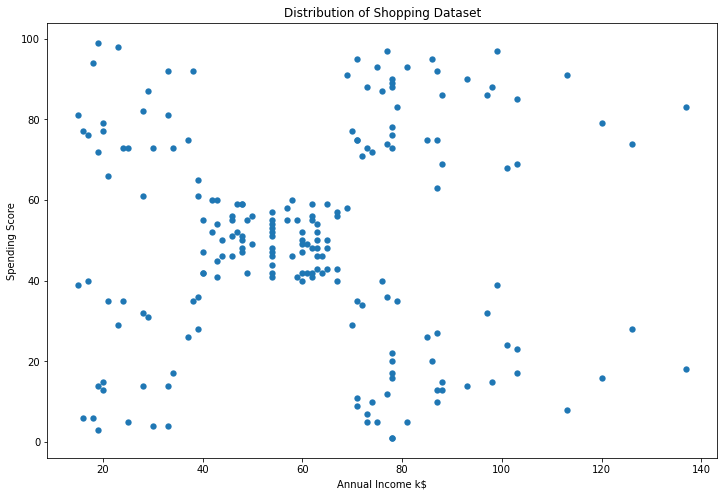

In [4]:
# Biểu đồ hoá các điểm dữ liệu trên đồ thị scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1], lw=0, s=40)
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score')
plt.title('Distribution of Shopping Dataset')

Ta nhận thấy sự phân bố của dữ liệu có thể được chia thành 5 cụm khác nhau. Trong đó có 1 cụm ở trung tâm và 4 cụm còn lại nằm ở 4 góc.

Trước khi tiến hành xây dựng mô hình phân cụm, chúng ta cần chuẩn hoá giữ liệu để loại bỏ sự khác biệt về mặt đơn vị giữa các chiều. Phương pháp chuẩn hoá được áp dụng là MinMaxScaler.

In [5]:
std = MinMaxScaler()
X_std = std.fit_transform(X)

## 14.6.1. Biểu đồ dendrogram

Trong phương pháp _phân cụm phân cấp_, biểu đồ _dendrogram_ có thể giúp xác định được số lượng cụm được phân chia hợp lý. Bằng cách vẽ một đường thẳng nằm ngang tương ứng với một mức độ khác biệt của các cụm, ta có thể xác định được có bao nhiêu cụm được phân chia có level nằm bên dưới đoạn thẳng này. Số lượng các điểm dữ liệu trong từng cụm cũng được thể hiện trong biểu đồ. Mức độ khác biệt giữa các cụm sẽ được thể hiện qua độ cao của các node. Một biểu đồ mà có các cụm bên dưới nằm thấp hơn so với các cụm bên trên thì thường là những bộ dữ liệu mà phương pháp _phân cụm phân cấp_ đã xác định được qui luật phân cụm tổng quát.

Tiếp theo ta sẽ vẽ biểu đồ _dendrogram_ để nhận biết các cụm cần phân chia. Để vẽ biểu đồ này chúng ta sử dụng package `scipy.cluster.hierarchy.dendrogram`. Phương pháp được sử dụng để xác định các cụm là _Ward linkage_.

Text(0, 0.5, 'dissimilarity metric cluster')

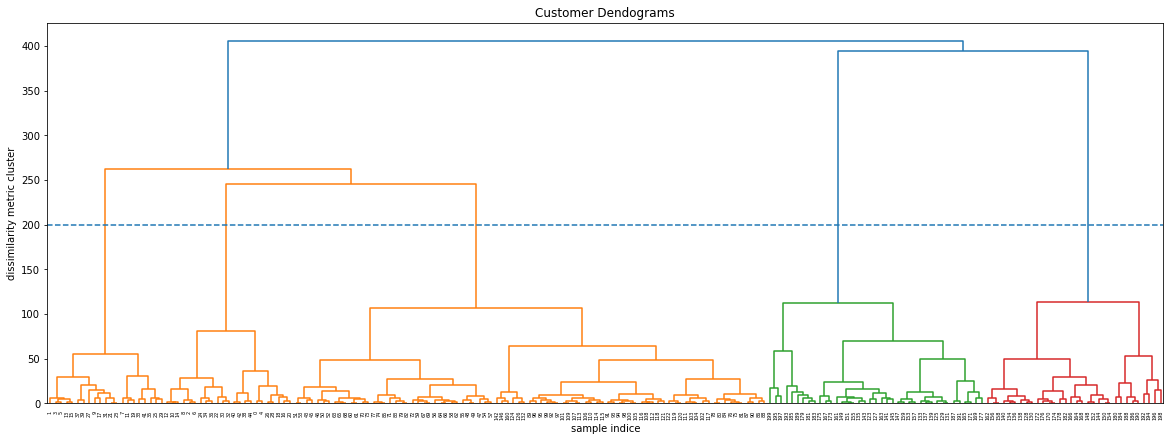

In [6]:
plt.figure(figsize=(20, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(200, linestyle='--')
plt.xlabel('sample indice')
plt.ylabel('dissimilarity metric cluster')

Trong biểu đồ _dendogram_ mà bạn nhìn thấy ở trên, trục hoành (_horizontal axis_) là thứ tự index của các quan sát trong bộ dữ liệu gốc, trục tung (_vertical axis_) thể hiện mức độ khác biệt giữa các cụm được tính toán thông qua thước đo sự khác biệt, trong biểu đồ trên chính là khoảng cách cụm được tính theo phương pháp _Ward linkage_. Nhìn vào đồ thị _dendrogram_ ta có thể dễ dàng xác định được rằng với cùng một giá trị mức độ khác biệt là 200 thì chúng ta có thể tạo thành 5 cụm phân biệt.

## 14.6.2. Xây dựng mô hình phân cụm phân cấp hợp nhất

Để xây dựng biểu đồ _phân cụm phân cấp_ theo _phương pháp hợp nhất_ chúng ta sử dụng class [sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering). Trong class này chúng ta cần khai báo các thông tin:

```
AgglomerativeClustering(
  n_clusters=2,  
  affinity='euclidean',
  compute_full_tree='auto', 
  linkage='ward', 
  distance_threshold=None, 
  compute_distances=False)
```

Trong đó `n_clusters` là số lượng cụm cần phân chia. `affinity` là phương pháp tính khoảng cách giữa các quan sát. Đây có thể là bất kì độ đo khoảng cách nào, trong đó 5 khoảng cách thông dụng nhất là `euclidean, l1, l2, manhattan, cosine`. `linkage` là phương pháp áp dụng để tính khoảng cách giữa các cụm bao gồm `ward, complete, average, single` trong đó mặc định là `ward`.

Bên dưới chúng ta sẽ cùng khởi tạo một thuật toán phân cụm với 5 cụm, sử dụng khoảng các cụm là `ward linkage` và phương pháp tính khoảng cách giữa các điểm là `euclidean`.

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(X_std)

Vẽ biểu đồ các cụm trong không gian hai chiều

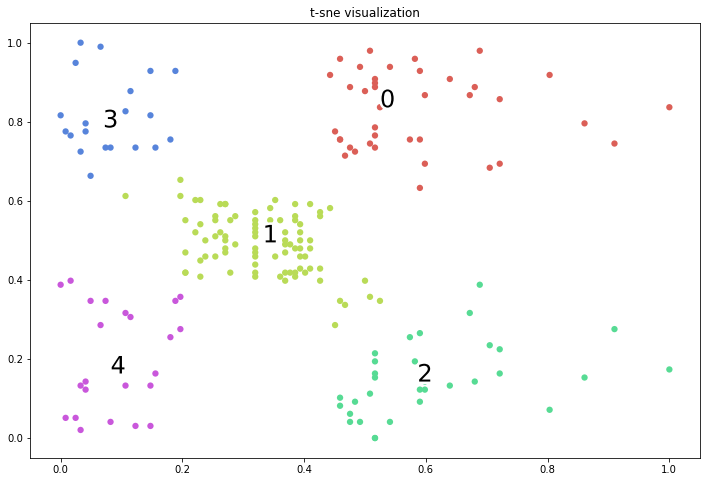

In [8]:
def _plot_kmean_scatter(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(np.int)])

    # thêm nhãn cho mỗi cluster
    txts = []

    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.title('t-sne visualization')

_plot_kmean_scatter(X_std, labels)

# 14.7. Tổng kết

Như vậy qua bài naỳ bạn đã nắm được ý tưởng đằng sau thuật toán _phân cụm phân cấp_. Đây là thuật toán dựa trên chiến lược phân chia (_divisive_) hoặc hợp nhất (_agglomerative_) các cụm theo sơ đồ  của đồ thị _dendrogram_. Thuật toán sẽ bao gồm $N$ bước, tại mỗi bước ta sẽ tìm cách gộp hoặc tách một điểm vào một cụm dựa trên khoảng cách của nó với những điểm còn lại. Thuật toán sẽ dừng cho đến khi đạt ngưỡng về số lượng cụm hoặc đạt ngưỡng về chất lượng của một cụm như đường kính, bán kính, mật độ điểm.

Mặc dù là thuật toán khá hiệu quả nhưng _phân cụm phân cấp_ lại có chi phí tính toán khá lớn, lên tới $O(N^3)$. Do đó chỉ nên áp dụng phương pháp này đối với những bộ dữ liệu có kích thước vừa phải. Để củng cố lại kiến thức về thuật toán _phân cụm phân cấp_ chúng ta hãy cùng làm những bài tập bên dưới.

# 14.8. Bài tập

1. Có những chiến lược phân cụm nào trong thuật toán _phân cụm phân cấp_?
2. Theo chiến lược hợp nhất, ở thời điểm ban đầu chúng ta có tổng cộng bao nhiêu cụm?
3. Phương pháp _phân cụm phân cấp_ sẽ trải qua bao nhiêu bước ?
4. Để xác định khoảng cách giữa các cụm, chúng ta có những phương pháp đo lường nào?
5. Phương pháp đo lường khoảng cách cụm theo _ward linkage_ chỉ phù hợp khi dữ liệu tồn tại trong không gian nào?
6. Có những phương pháp nào để dừng quá trình phân cụm?
7. Sử dụng bộ dữ liệu [wine](https://archive.ics.uci.edu/ml/datasets/wine) hãy phân chia tập train/test và khảo sát bộ dữ liệu.
8. Thực hiện giảm chiều dữ liệu và chuẩn hoá dữ liệu đầu vào.
9. Xây dựng mô hình phân cụm chất lượng rượi từ các trường dữ liệu đầu vào. Lưu ý không sử dụng biến mục tiêu trong quá trình huấn luyện.
10. Sử dụng biến mục tiêu thật từ bộ dữ liệu để đánh giá độ chính xác của thuật toán phân cụm. Biểu đồ hoá phân phối các cụm trong không gian hai chiều.

# 14.9. Tài liệu tham khảo

1. [The Elements of Statistical Learning, page 520-528](https://web.stanford.edu/~hastie/ElemStatLearn/)

2. https://statweb.stanford.edu/~jtaylo/courses/stats202/restricted/notes/week9_2x2.pdf

3. https://nlp.stanford.edu/IR-book/html/htmledition/hierarchical-agglomerative-clustering-1.html

4. http://www.econ.upf.edu/~michael/stanford/maeb7.pdf

5. https://www.youtube.com/watch?v=rg2cjfMsCk4

6. https://jbhender.github.io/Stats506/F18/GP/Group10.html

7. https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/